##### Author: Pablo Iañez Picazo 
##### Biomedical Data Science lab, ISGlobal

In [2]:
# Load all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import umap

random.seed(22)
sns.set_style("ticks")

# Supress all warnings (bcoz they're quite annoying)
import warnings

warnings.filterwarnings("ignore")

import sys

sys.path.append("/home/pianez/phd/projects/hsc_nucleus/hsc_rhoa")
from methods import hsc_spatial_stats as hsc
from globals import batches_out, new_names

In [3]:
sns.set(rc={"figure.figsize": (20, 16)})
sns.set_style("whitegrid")

In [4]:
# ------------------------ Set up some parameters --------------------------- #
# Image resolution after resizing, which is 5 micrometers per pixel
res = 0.1
# cluster forming threshold - threshold at which intensities above this value
# will be considered belonging to a DAPI-Intense Region (DIR)
# Intensities to 0.6 are the one in the quantile 0.80 in young, old and treated
cft = 0.6
normalization = "z_score"
folder = "../data/preprocessed/"
conditions = [
    "young",
    "aged",
    "aged_treated_RhoAi",
    "myeloid_progenitors",
]

palette = {
    "Young": (0.00392, 0.45098, 0.69803),
    "Aged": (0.00784, 0.61960, 0.45098),
    "Aged + Ri": (0.8, 0.47058, 0.73725),
    "MP": (0.76868, 0.30588, 0.32156),
}

In [8]:
nuc_df = pd.read_csv(
    f"results/z_score_nuclei_3d_res{res}_cf{cft}_filt_df.csv", index_col=0
)
nuc_df = hsc.fix_labels(nuc_df)

In [9]:
print(nuc_df.shape)
nuc_df = nuc_df[~nuc_df["im_batch"].isin(batches_out)]
print(nuc_df.shape)

(837, 92)
(780, 92)


In [10]:
# I have left out those features that are highly correlated with others
# Correlation higher than 0.9 or lower than -0.9
features = [
    "volume",
    "width",
    "length",
    "height",
    "height deviation",
    "aspect ratio",
    "major axis length",
    "minor axis length",
    "min intensity",
    "max intensity",
    "solidity",
    "surface area",
    "sphericity",
    "invagination proportion",
    "DIRs volume",
    "DIRs width",
    "DIRs length",
    "DIRs height",
    "intensity 0-0.5µm",
    "intensity 1-1.5µm",
    "intensity ratio",
    "DIRs aspect ratio",
    "DIRs surface area",
    "DIRs major axis length",
    "DIRs sphericity",
    "DIRs surface/volume",
    "DIRs mean intensity",
    "DIRs max intensity",
    "DIRs solidity",
    "DIRs centroid distance to border",
    "DIRs distance to border",
    "number of DIRs",
    "largest slide area",
    "largest slide major axis length",
    "largest slide minor axis length",
    "largest slide perimeter",
    "largest slide roundness",
    "largest slide compactness",
    "largest slide EOP",
    "condition",
    "im_path",
    "im_batch",
    "im_nuc",
]

print(len(features[:-4]))

subset_df = nuc_df[nuc_df["condition"].isin(["Young", "Aged", "Aged + Ri"])]
subset_df = subset_df.rename(columns=new_names)
subset_df = subset_df[features]

# Drop columns that contain NaN values
subset_df = subset_df.dropna()

39


In [11]:
subset_df.condition.value_counts()

Young        177
Aged         164
Aged + Ri    144
Name: condition, dtype: int64

In [12]:
pv_df = hsc.get_p_values(
    subset_df,
    subset_df.columns[:-3],
    by_col="condition",
    group1="Aged",
    group2="Aged + Ri",
)

In [13]:
pv_df.sort_values(by="p_float", ascending=True)

,p_float,p_string,significance,<0.05,<0.01,<0.001
min intensity,1.506444e-10,0.00000,***,True,True,True
intensity 0-0.5µm,1.717993e-07,0.00000,***,True,True,True
intensity 1-1.5µm,1.176923e-06,0.00000,***,True,True,True
intensity ratio,3.459169e-06,0.00000,***,True,True,True
volume,6.813926e-04,0.00068,***,True,True,True
DIRs major axis length,1.429758e-03,0.00143,**,True,True,False
sphericity,1.596659e-03,0.00160,**,True,True,False
minor axis length,3.918401e-03,0.00392,**,True,True,False
largest slide EOP,6.933987e-03,0.00693,**,True,True,False
DIRs height,7.690000e-03,0.00769,**,True,True,False


In [14]:
sig_f = pv_df[pv_df["<0.05"]].index.to_list()
sig_f

['volume',
 'minor axis length',
 'min intensity',
 'surface area',
 'sphericity',
 'DIRs length',
 'DIRs height',
 'intensity 0-0.5µm',
 'intensity 1-1.5µm',
 'intensity ratio',
 'DIRs major axis length',
 'DIRs sphericity',
 'DIRs surface/volume',
 'DIRs solidity',
 'number of DIRs',
 'largest slide perimeter',
 'largest slide roundness',
 'largest slide EOP']

In [15]:
corrmat = subset_df[sig_f].corr()
corrmat = corrmat.rename_axis(None).rename_axis(None, axis=1)
corrmat = corrmat.stack().reset_index()
corrmat.columns = ["var_1", "var_2", "correlation"]
corrmat = corrmat[corrmat["correlation"] != 1]
corrmat.sort_values(by="correlation", ascending=False).head(20)

,var_1,var_2,correlation
3,volume,surface area,0.976962
54,surface area,volume,0.976962
186,DIRs major axis length,DIRs height,0.937763
118,DIRs height,DIRs major axis length,0.937763
69,surface area,largest slide perimeter,0.789952
273,largest slide perimeter,surface area,0.789952
15,volume,largest slide perimeter,0.768095
270,largest slide perimeter,volume,0.768095
18,minor axis length,volume,0.766306
1,volume,minor axis length,0.766306


In [16]:
corrmat.sort_values(by="correlation", ascending=False).tail(20)

,var_1,var_2,correlation
310,largest slide EOP,sphericity,-0.450413
89,sphericity,largest slide EOP,-0.450413
158,intensity 1-1.5µm,number of DIRs,-0.473236
260,number of DIRs,intensity 1-1.5µm,-0.473236
257,number of DIRs,DIRs length,-0.491506
104,DIRs length,number of DIRs,-0.491506
194,DIRs major axis length,number of DIRs,-0.549880
262,number of DIRs,DIRs major axis length,-0.549880
263,number of DIRs,DIRs sphericity,-0.553833
212,DIRs sphericity,number of DIRs,-0.553833


In [17]:
sig_f_clean = [
    "volume",
    # "minor axis length",
    "min intensity",
    # "surface area",
    "sphericity",
    "DIRs length",
    # "DIRs height",
    "intensity 0-0.5µm",
    # "intensity 1-1.5µm",
    "intensity ratio",
    "DIRs major axis length",
    "DIRs sphericity",
    # "DIRs surface/volume",
    "DIRs solidity",
    "number of DIRs",
    # "largest slide perimeter",
    # "largest slide roundness",
    "largest slide EOP",
]

In [18]:
corrmat = subset_df[sig_f_clean].corr()
corrmat = corrmat.rename_axis(None).rename_axis(None, axis=1)
corrmat = corrmat.stack().reset_index()
corrmat.columns = ["var_1", "var_2", "correlation"]
corrmat = corrmat[corrmat["correlation"] != 1]
corrmat.sort_values(by="correlation", ascending=False).head(20)

,var_1,var_2,correlation
49,intensity 0-0.5µm,intensity ratio,0.723796
59,intensity ratio,intensity 0-0.5µm,0.723796
15,min intensity,intensity 0-0.5µm,0.644967
45,intensity 0-0.5µm,min intensity,0.644967
69,DIRs major axis length,DIRs length,0.554725
39,DIRs length,DIRs major axis length,0.554725
11,min intensity,volume,0.501216
1,volume,min intensity,0.501216
9,volume,number of DIRs,0.439735
99,number of DIRs,volume,0.439735


In [19]:
corrmat.sort_values(by="correlation", ascending=False).tail(20)

,var_1,var_2,correlation
58,intensity ratio,DIRs length,-0.202164
38,DIRs length,intensity ratio,-0.202164
47,intensity 0-0.5µm,DIRs length,-0.206291
37,DIRs length,intensity 0-0.5µm,-0.206291
51,intensity 0-0.5µm,DIRs sphericity,-0.215407
81,DIRs sphericity,intensity 0-0.5µm,-0.215407
7,volume,DIRs sphericity,-0.220860
77,DIRs sphericity,volume,-0.220860
74,DIRs major axis length,DIRs solidity,-0.276911
94,DIRs solidity,DIRs major axis length,-0.276911


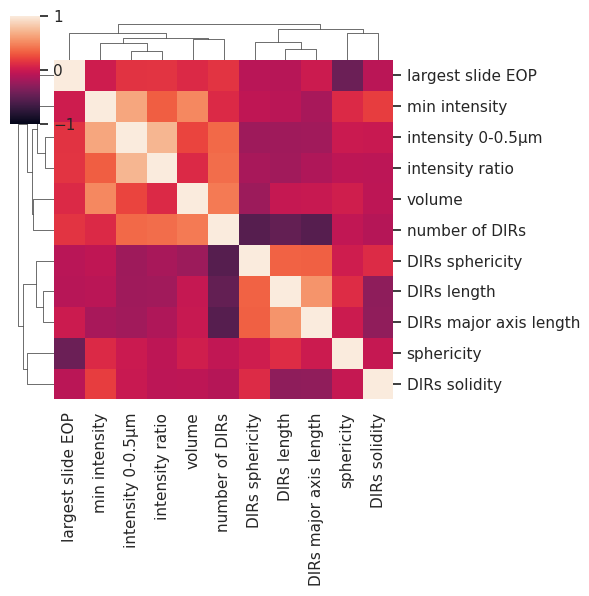

In [20]:
sns.clustermap(
    subset_df[sig_f_clean].corr(),
    dendrogram_ratio=0.1,
    vmin=-1,
    vmax=1,
    figsize=(6, 6),
)

In [21]:
subset_df = subset_df[subset_df["condition"].isin(["Aged", "Aged + Ri"])]
subset_df.reset_index(drop=True, inplace=True)

<Figure size 1000x600 with 0 Axes>

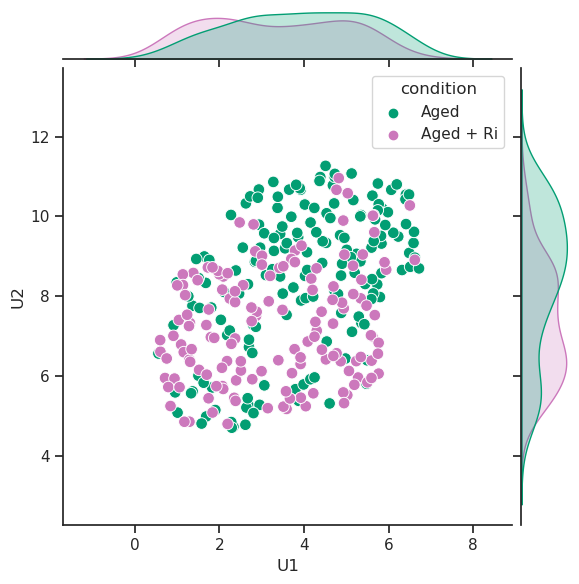

In [22]:
from sklearn.preprocessing import StandardScaler

sns.set_style("ticks")
# Create the UMAP object
reducer = umap.UMAP(
    min_dist=0.2,
    n_neighbors=15,
    n_components=2,
    random_state=2023,
    metric="euclidean",
)

# Extract numerical data
x = subset_df[sig_f_clean].values

# Learn the scaler on the young and confined cells and apply
# it to the old and treated cells
transformer = StandardScaler()
x = transformer.fit_transform(x)

# Learn the UMAP on the young and confined cells and apply
# it to the old and treated cells
embedding = reducer.fit_transform(x)
umap_df = pd.DataFrame(data=embedding, columns=["U1", "U2"])
umap_df = pd.concat([umap_df, subset_df[features]], axis=1)

plt.figure(figsize=(10, 6))
plot = sns.jointplot(
    data=umap_df,
    x="U1",
    y="U2",
    hue="condition",
    s=70,
    palette=palette,
    height=6,
    ratio=8,
)
# plot.ax_marg_x.set_xlim(3, 12)
# plot.ax_marg_y.set_ylim(1, 8)

<Figure size 1000x600 with 0 Axes>

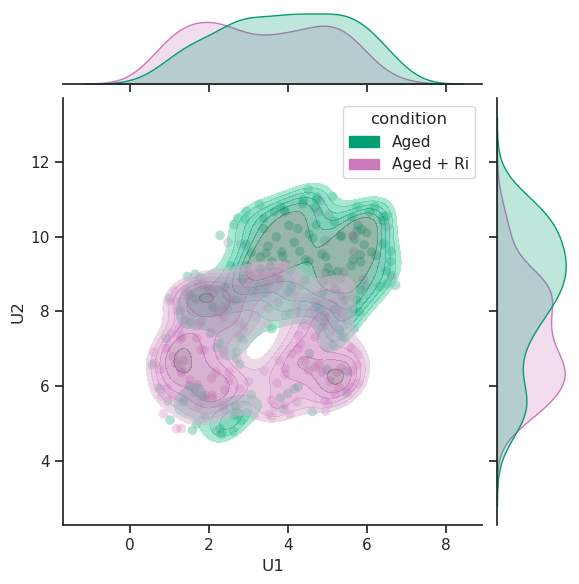

In [23]:
plt.figure(figsize=(10, 6))
plot = sns.jointplot(
    data=umap_df,
    x="U1",
    y="U2",
    hue="condition",
    kind="scatter",
    s=50,
    palette=palette,
    alpha=0.3,
)
plot.plot_joint(
    sns.kdeplot,
    data=umap_df,
    hue="condition",
    kind="kde",
    fill=True,
    levels=7,
    thresh=0.3,
    alpha=0.5,
    bw_adjust=0.75,
    palette=palette,
)
# plot.ax_marg_x.set_xlim(2, 13)
# plot.ax_marg_y.set_ylim(4, 12)